In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso

data = pd.read_csv(f'D:/Python/lab3/Automobile_data.csv', sep=',')
data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [17]:
print(data.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [18]:
print(data.describe())

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [19]:
data.replace('?', pd.NA, inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,<NA>,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [20]:
print(data.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [21]:
data = data.dropna()
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


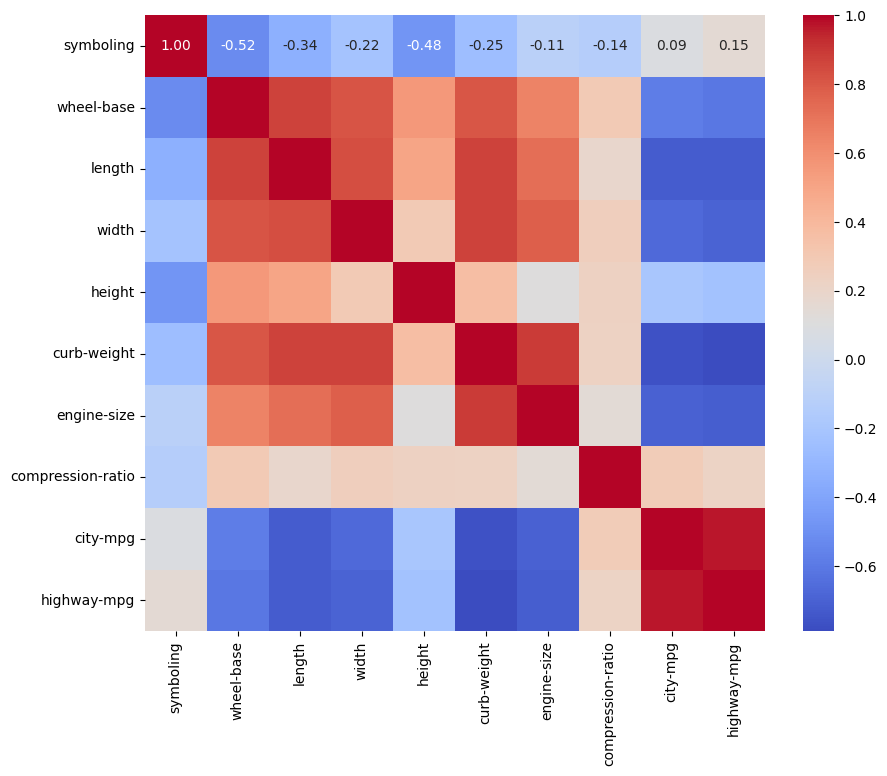

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

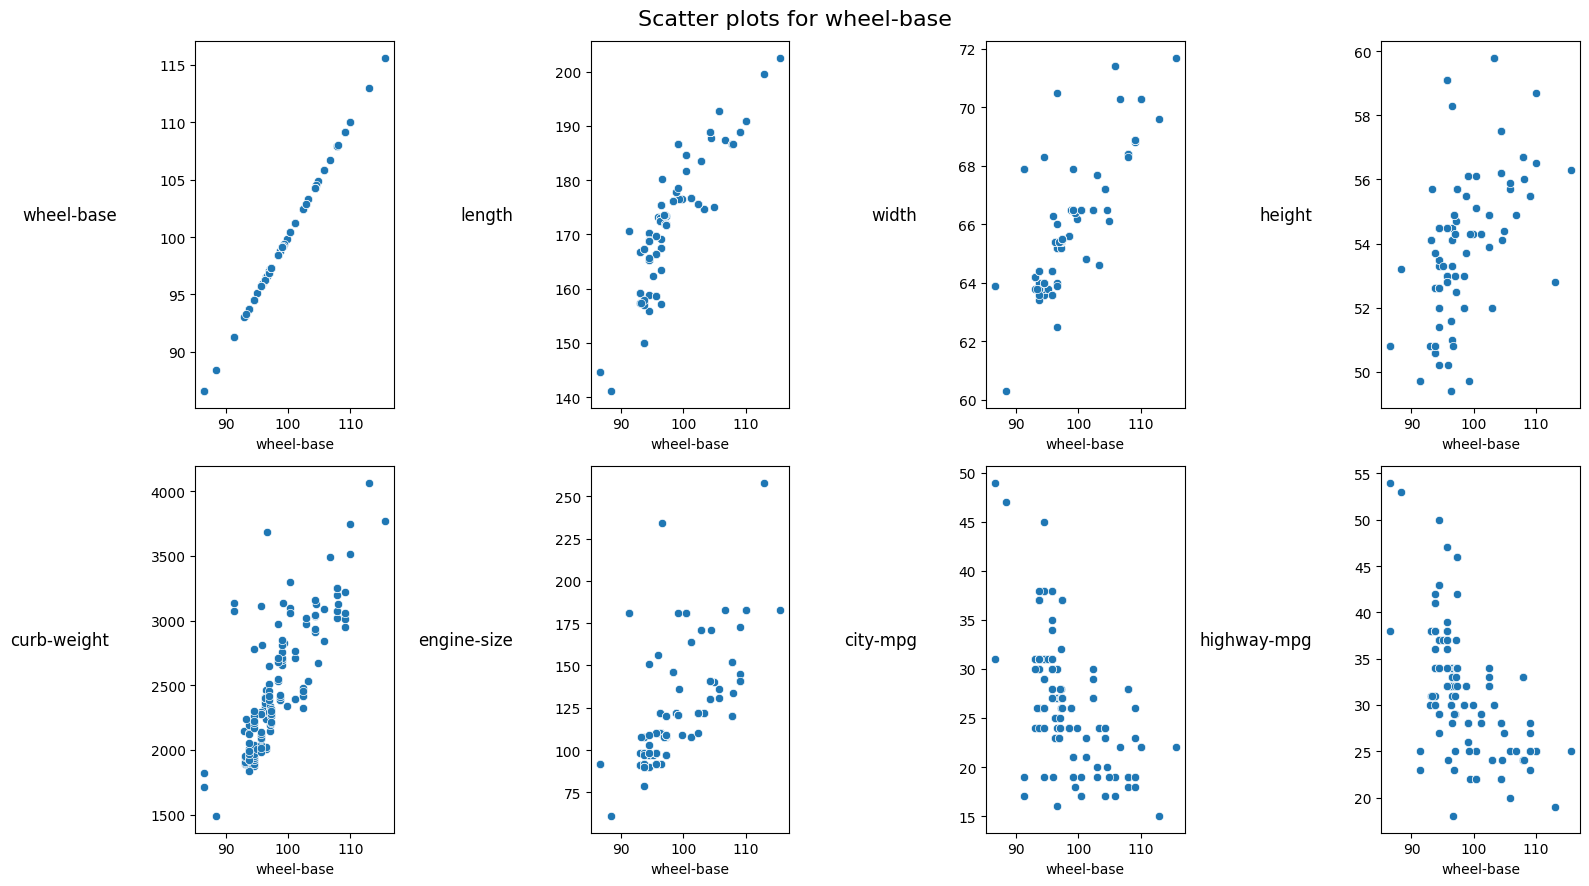

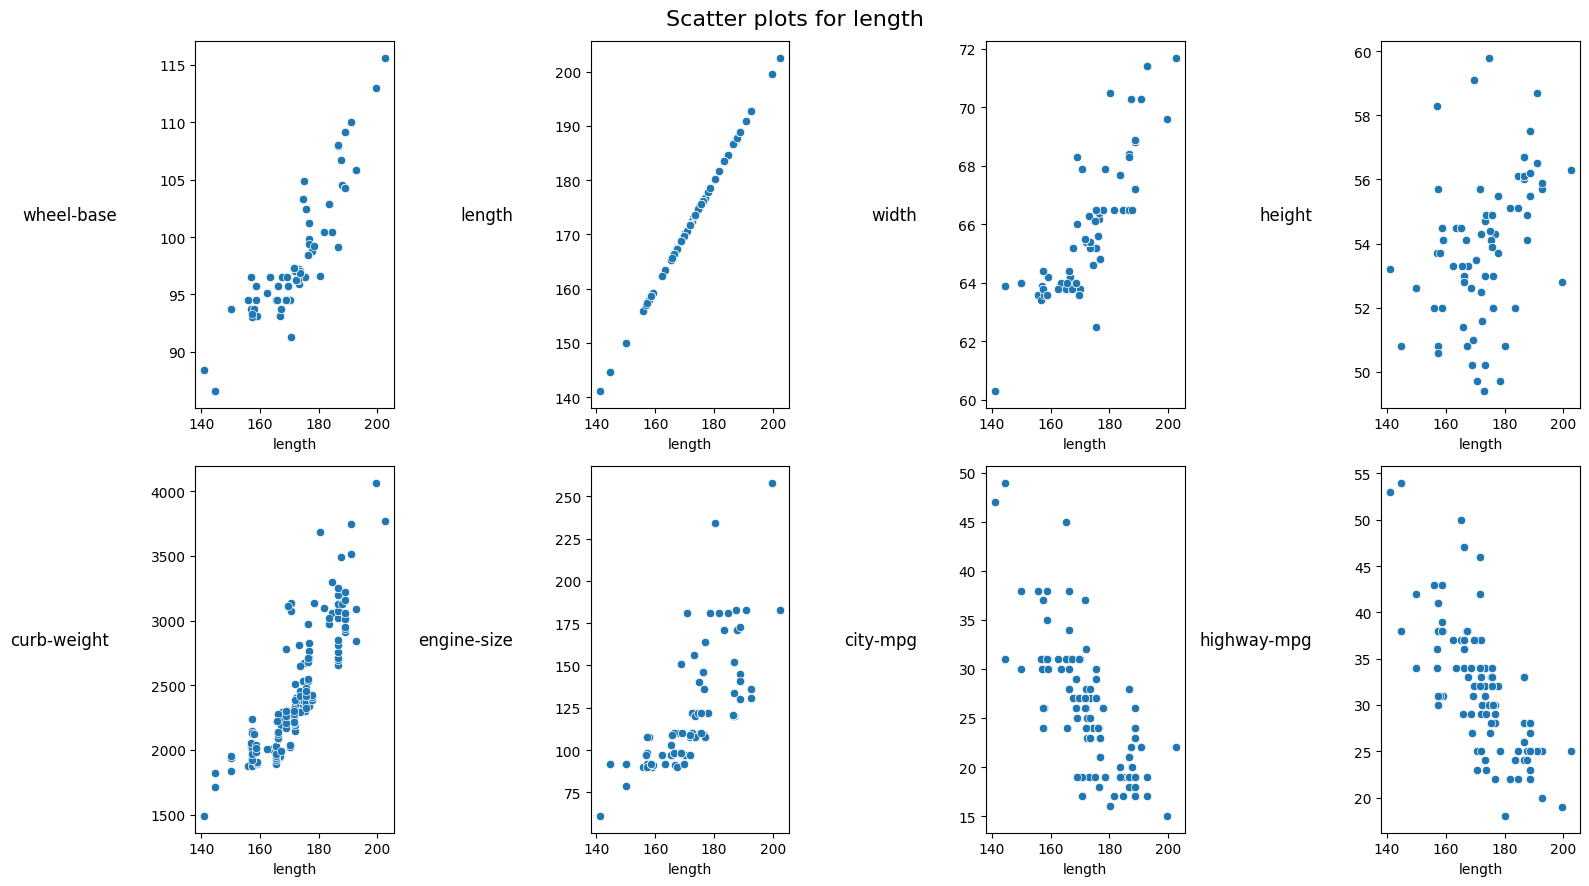

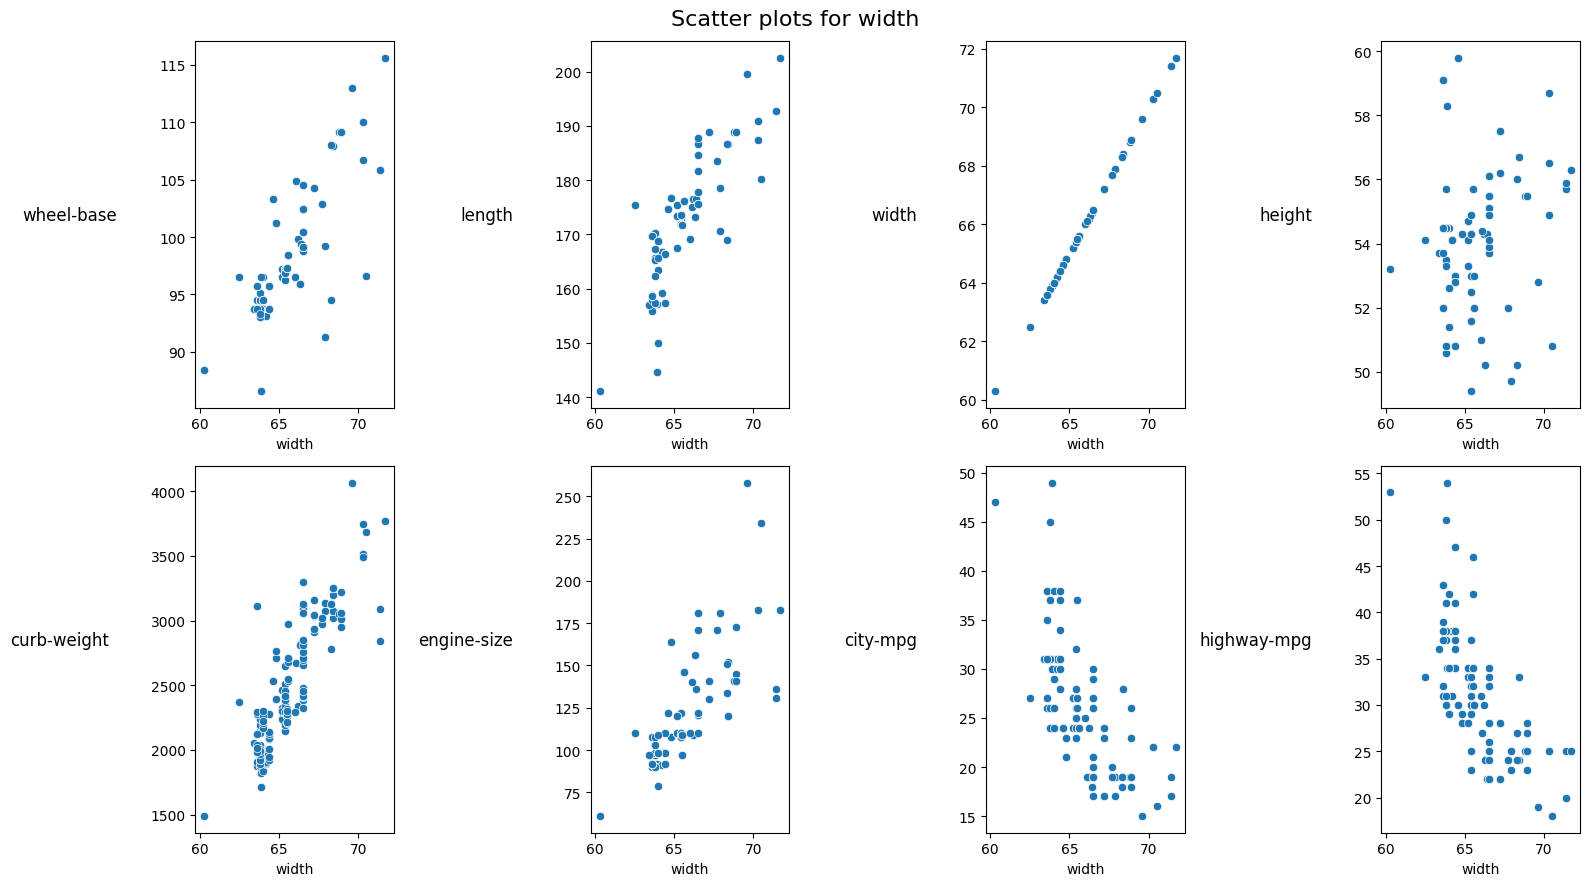

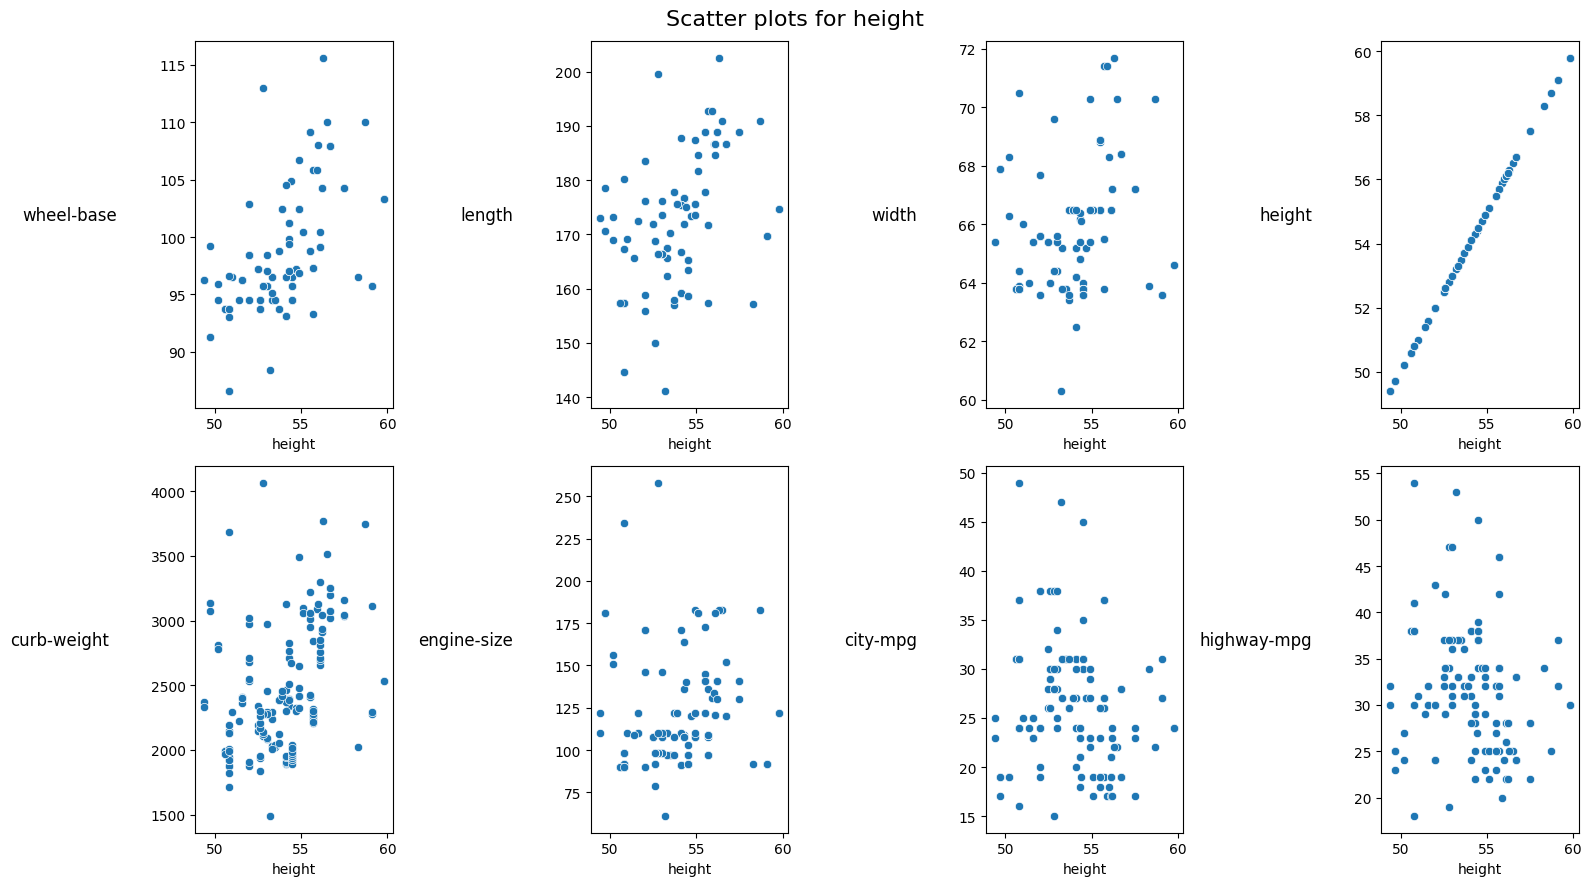

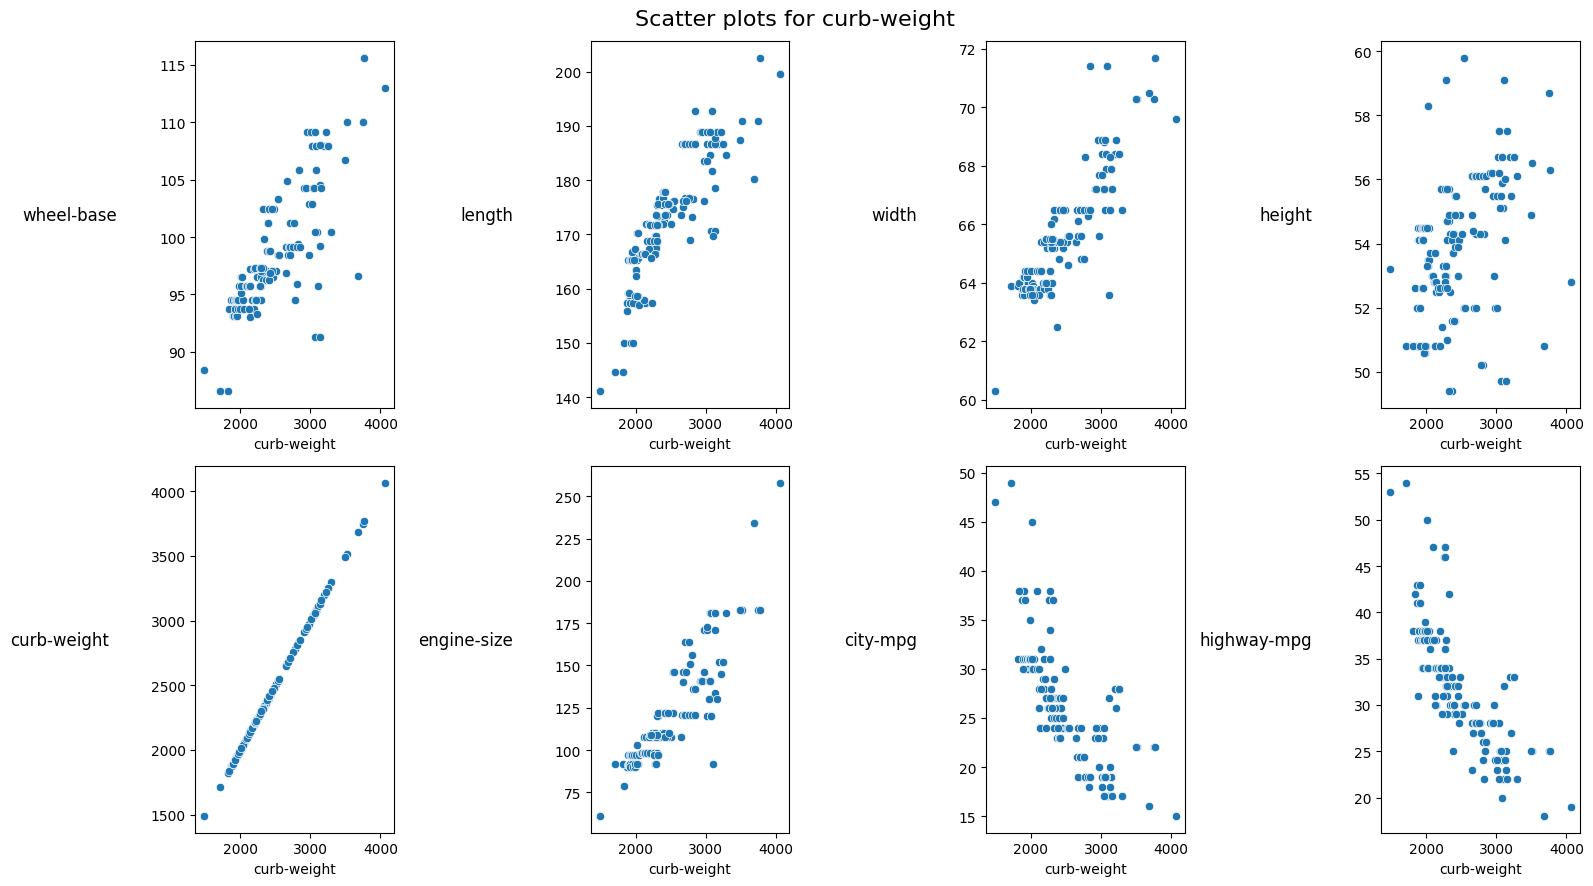

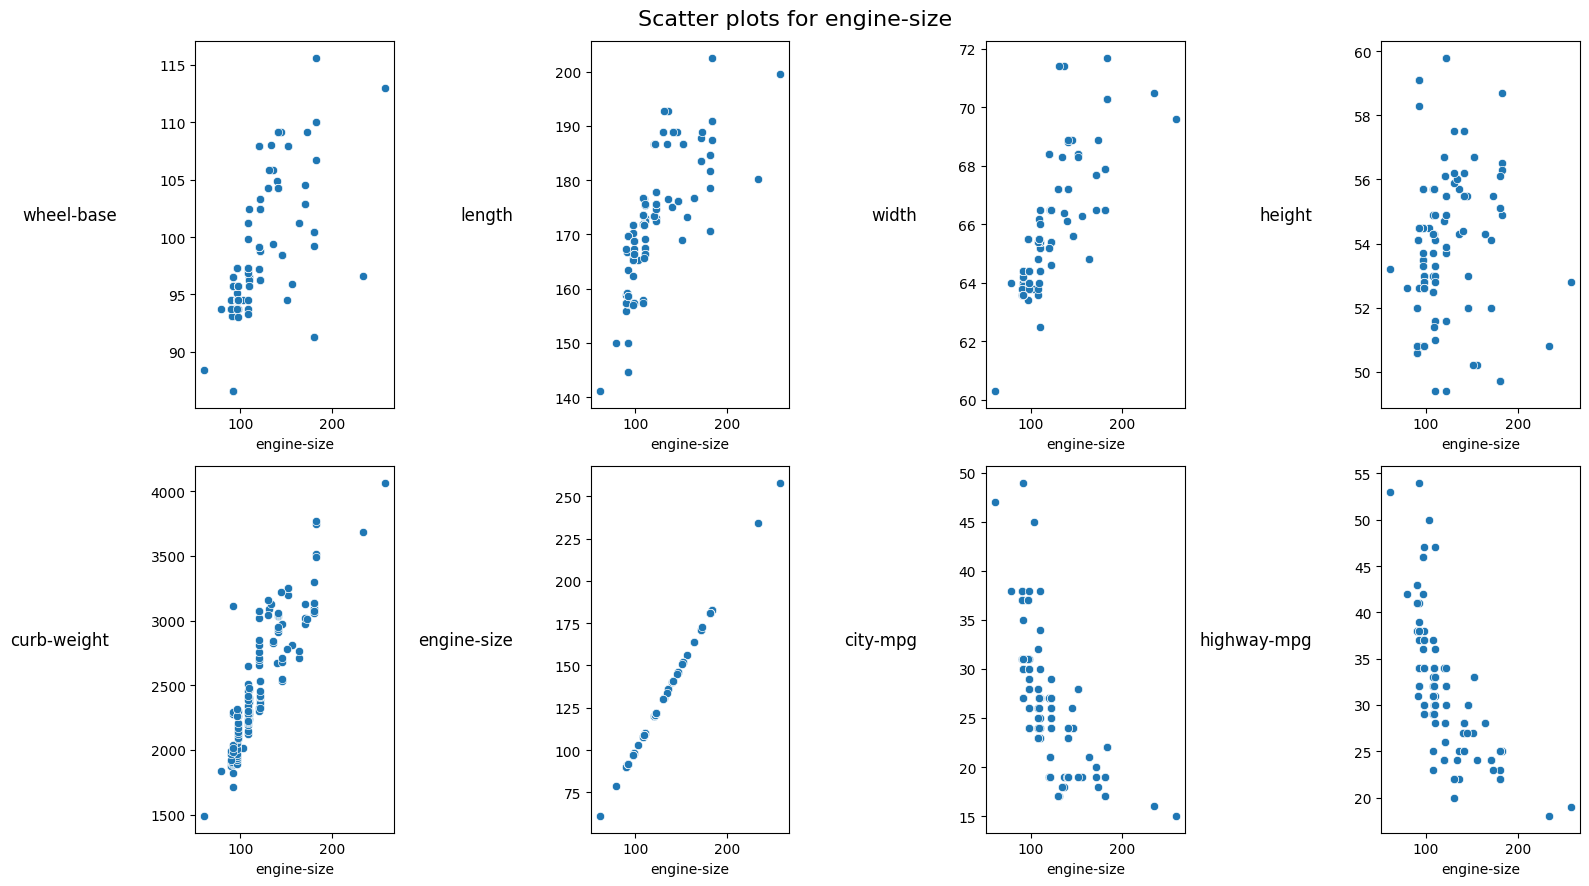

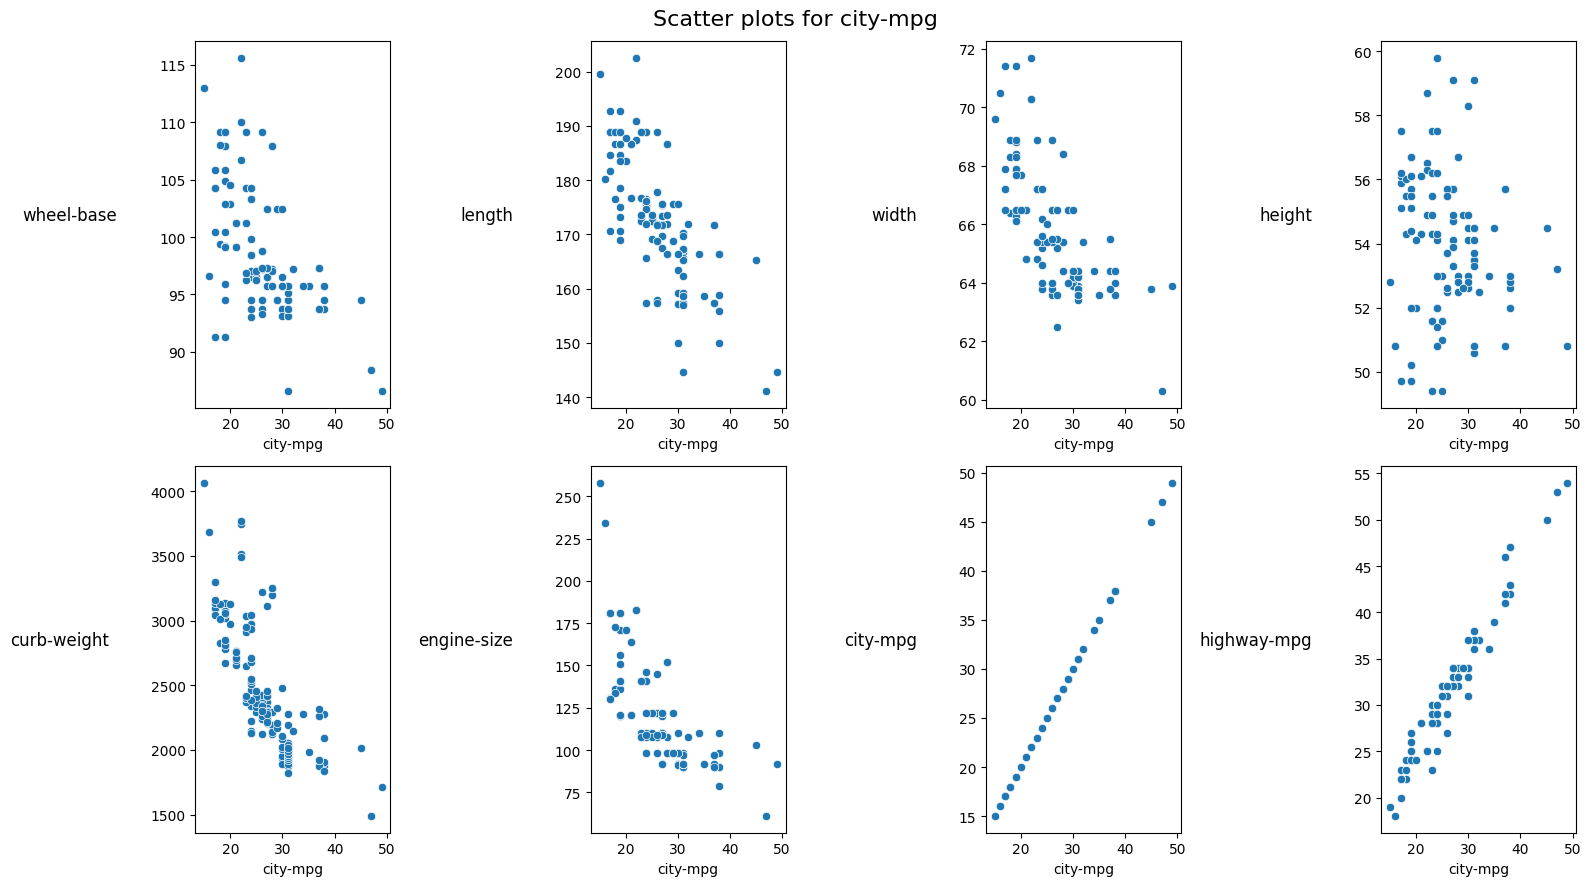

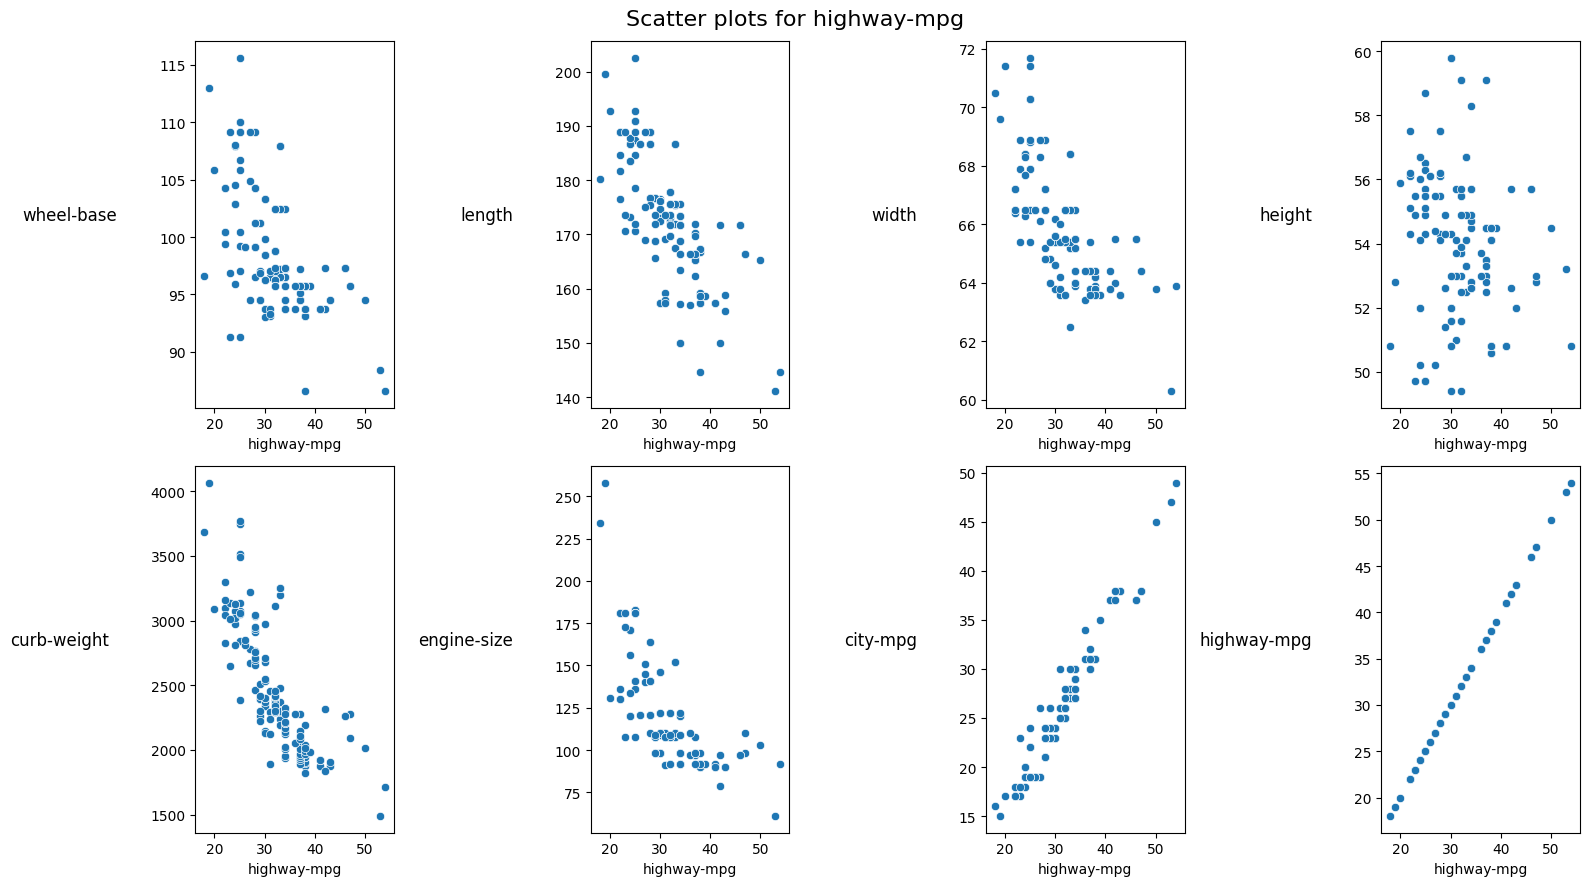

In [23]:
numeric_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']

for feature in numeric_features:
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 9))
    
    for i, other_feature in enumerate(numeric_features):
        sns.scatterplot(x=feature, y=other_feature, data=data, ax=axes[i//4, i%4])
        
        axes[i//4, i%4].set_ylabel(other_feature, rotation=0, labelpad=30, fontsize=12, ha='right')

    fig.suptitle(f"Scatter plots for {feature}", fontsize=16)    
    plt.tight_layout()
    plt.show()

Графіки ілюструють відношення між ціною і кожною з числових ознак. 
Основна мета діаграм розсіювання полягає у візуалізації зв'язку між двома числовими змінними. 
Кожен графік розсіювання відповідає конкретній парі змінних, де вісь x представляє одну з ознак, а вісь y відображає ціну. 
Ці графіки дозволяють спостерігати за змінами вартості автомобіля в залежності від конкретної числової характеристики, 
що допомагає візуалізувати можливі статистичні зв'язки між властивостями та цільовим параметром - ціною.
Із Графіків розсіювання для відношень ціни та числових властивостей бачимо, що не всі дані гарно корелюють між собою і хоч якось впливають один на одного, що впринципі очевидно.


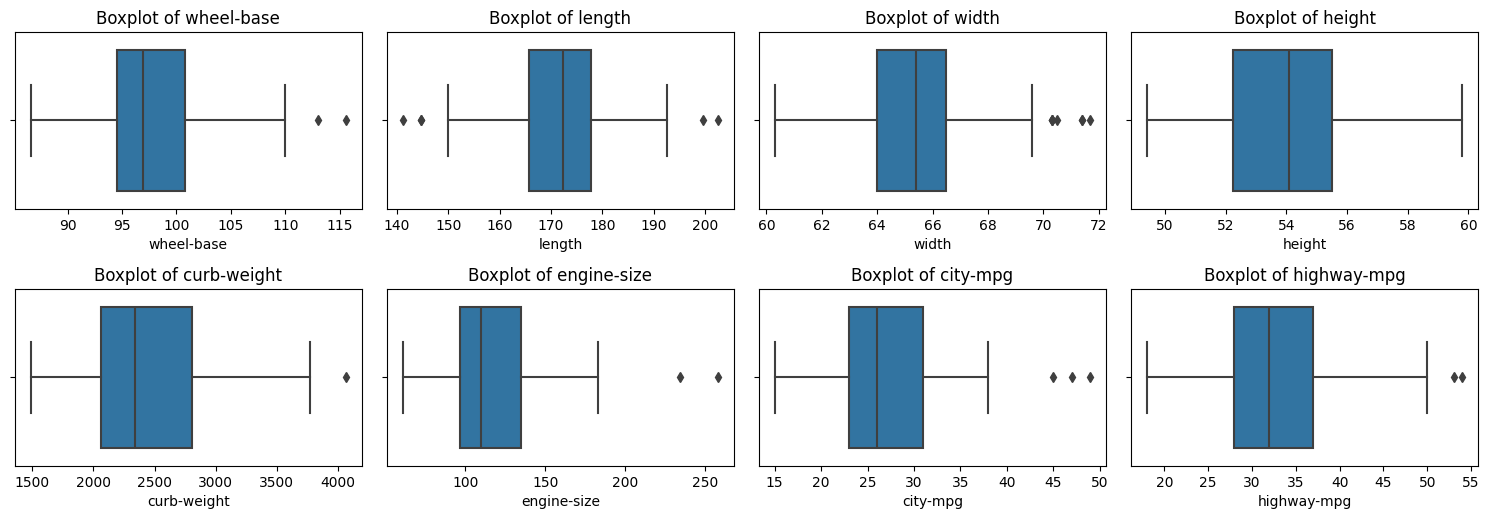

In [24]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

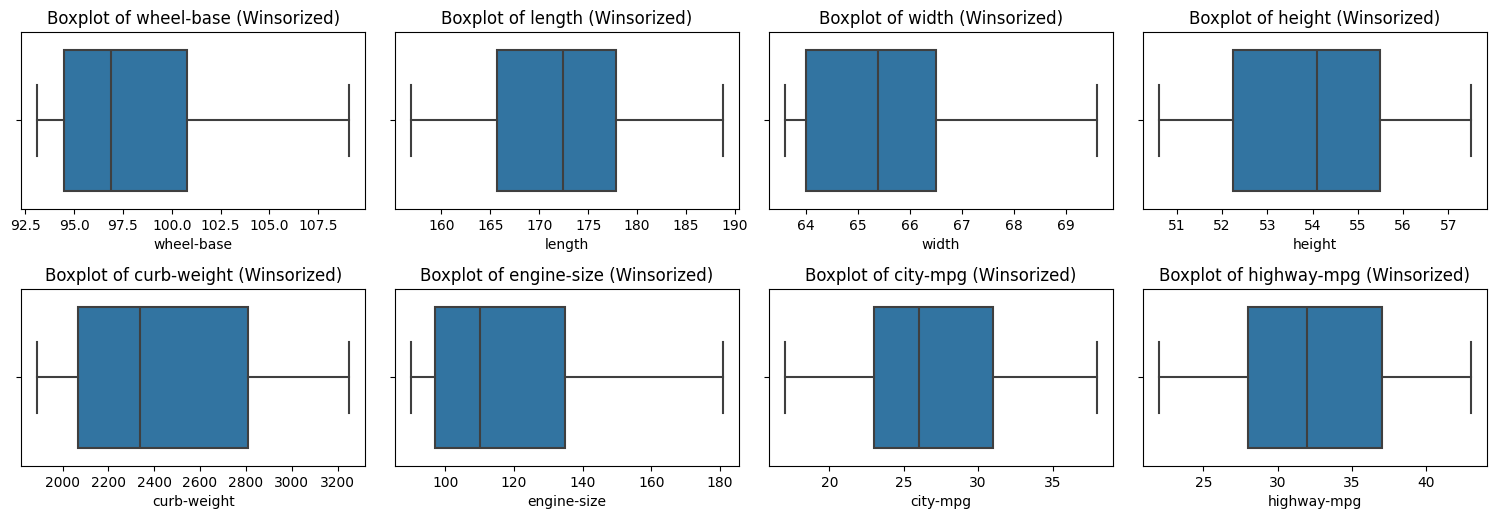

In [25]:
from scipy.stats.mstats import winsorize

winsorized_data = data.copy()
for feature in numeric_features:
    winsorized_data[feature] = winsorize(data[feature], limits=[0.05, 0.05])

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=winsorized_data[feature])
    plt.title(f'Boxplot of {feature} (Winsorized)')

plt.tight_layout()
plt.show()

c:\Users\LEGION\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LEGION\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\LEGION\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\LEGION\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.277e+02, tolerance: 2.750e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\LEGION\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

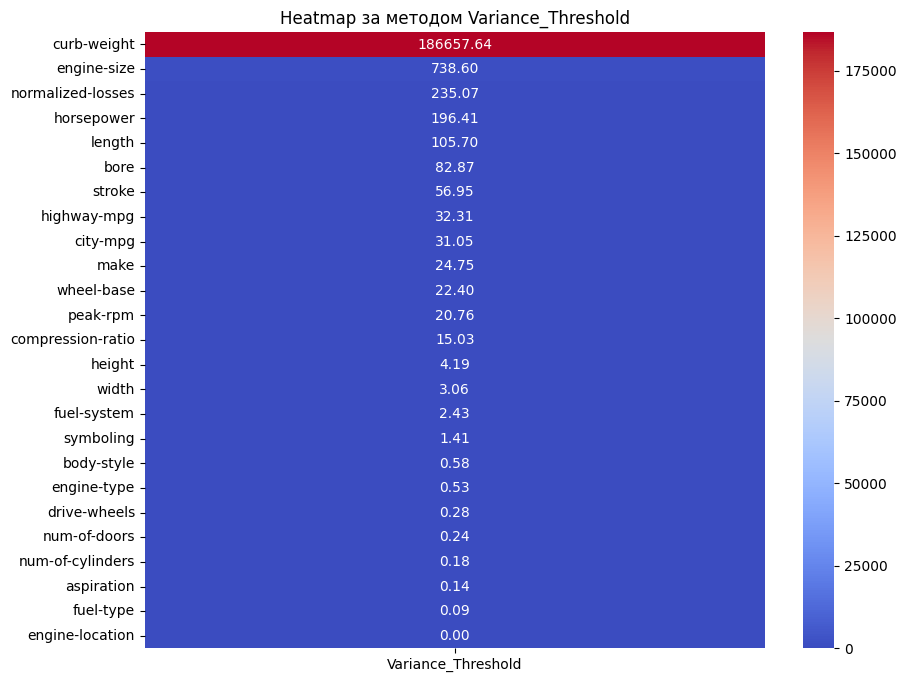

c:\Users\LEGION\miniconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


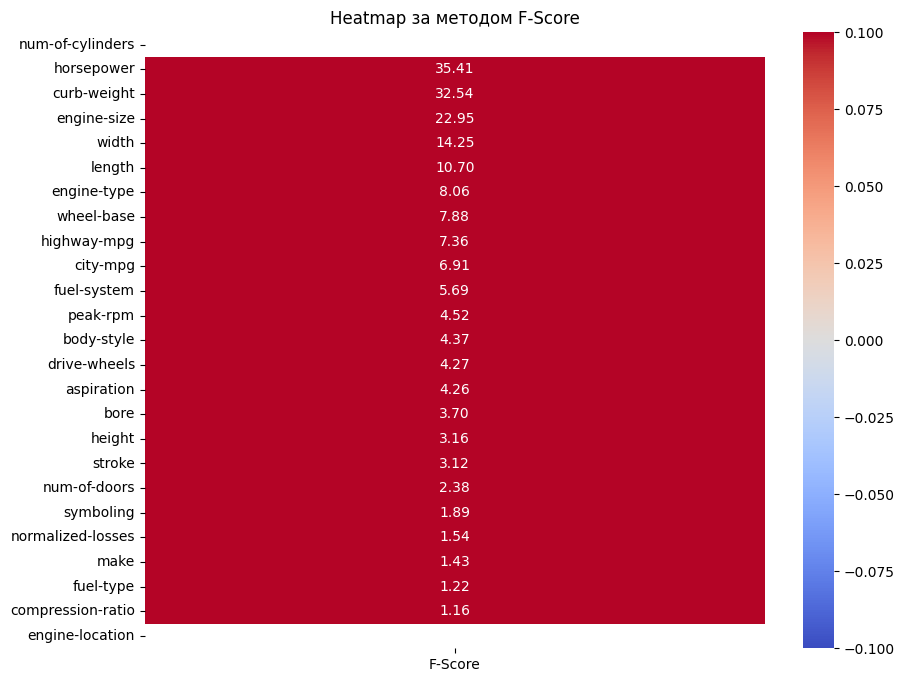

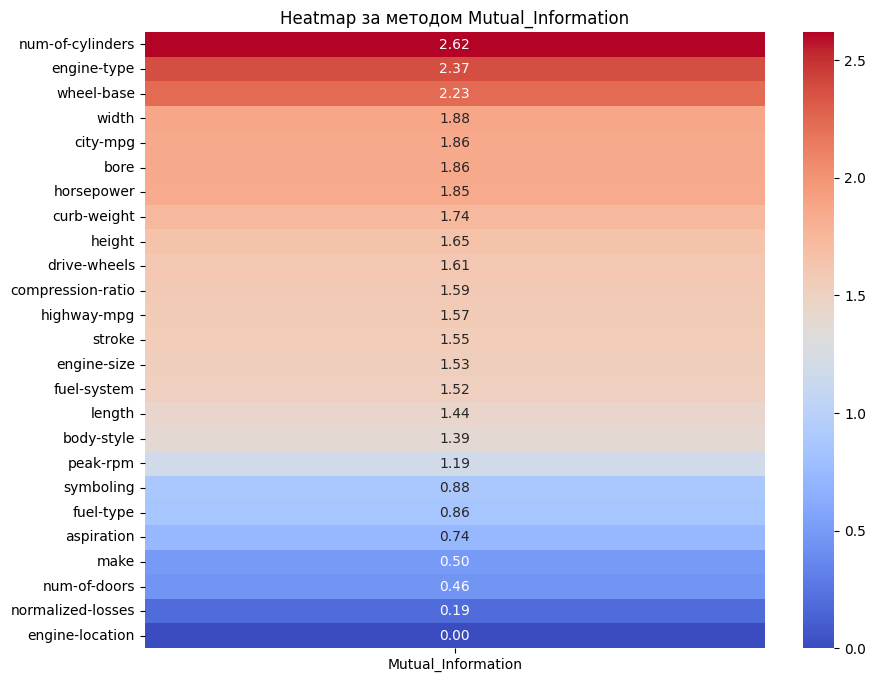

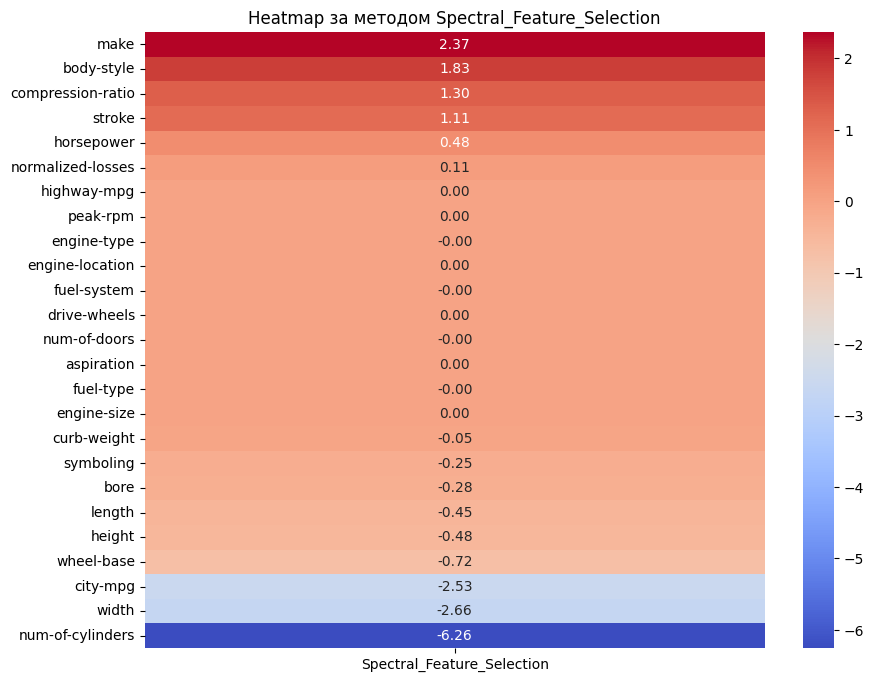

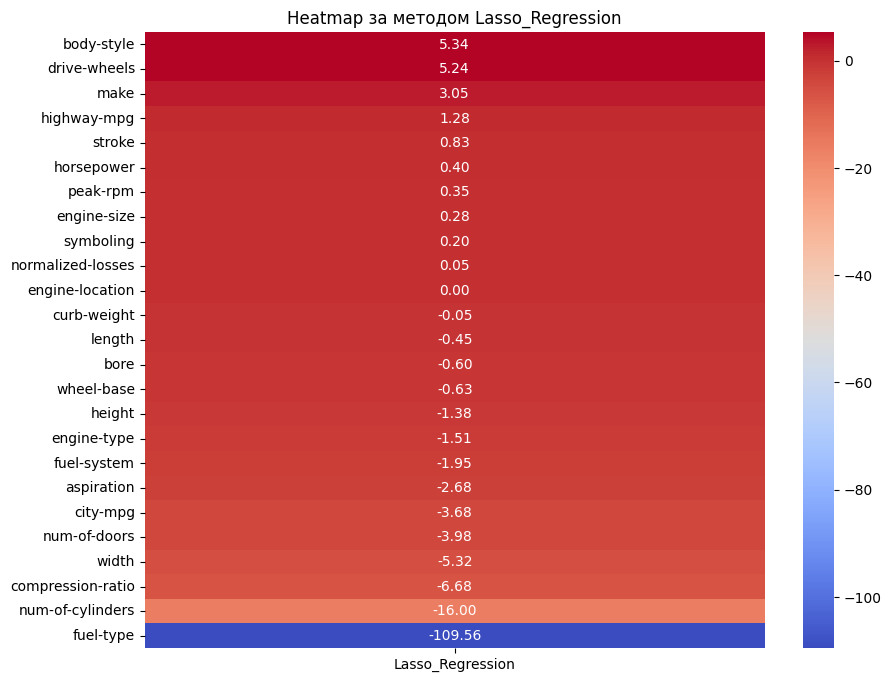

In [26]:
le = LabelEncoder()
for column in winsorized_data.select_dtypes(include='object').columns:
    winsorized_data[column] = le.fit_transform(winsorized_data[column])

X = winsorized_data.drop('price', axis=1)
y = winsorized_data['price']

# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_variance_threshold = selector.fit_transform(X)

# F-Score
selector_fscore = SelectKBest(f_classif, k='all')
X_fscore = selector_fscore.fit_transform(X, y)

# Mutual Information
selector_mutual_info = SelectKBest(mutual_info_classif, k='all')
X_mutual_info = selector_mutual_info.fit_transform(X, y)

# Spectral Feature Selection
selector_spectral = SelectFromModel(Lasso())
X_spectral = selector_spectral.fit_transform(X, y)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X, y)
selector_lasso = SelectFromModel(lasso_model)
X_lasso = selector_lasso.fit_transform(X, y)


# Збереження результатів в результуючий ранжований датафрейм
feature_ranking = pd.DataFrame(index=X.columns)

feature_ranking['Variance_Threshold'] = selector.variances_
feature_ranking['F-Score'] = selector_fscore.scores_
feature_ranking['Mutual_Information'] = selector_mutual_info.scores_
feature_ranking['Spectral_Feature_Selection'] = selector_spectral.estimator_.coef_
feature_ranking['Lasso_Regression'] = selector_lasso.estimator_.coef_
methods = ['Variance_Threshold', 'F-Score', 'Mutual_Information', 'Spectral_Feature_Selection', 'Lasso_Regression']

for method in methods:
    plt.figure(figsize=(10, 8))
    sns.heatmap(feature_ranking[[method]].sort_values(by=method, ascending=False), cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(f"Heatmap за методом {method}")
    plt.show()

За допомогою Variance Threshold розглянемо дисперсію та варіативність для кожної ознаки.
Далі за допомогою F-Score кожній ознаці надається бал, який базується на тому як добре вона розрізняє класи в залежних змінних
Також Mutual Information, який я використав для того щоб дізнатися інформативність та деяку унікальність кожної ознаки
Spectral feature selection був використаний також для додаткового визначення важливості ознак
І Lasso regression у якості ще одного додаткового параметра, який мінімізує суму квадратів помилок.

Дослідження дозволяє нам зробити кілька висновків щодо важливості представлених ознак у визначенні ціни автомобілів:

Make (Марка): Ця ознака виявилася дуже важливою. Ймовірно, вона має суттєвий вплив на модель, але важливість може залежати від конкретного способу кодування марок автомобілів.

Числові ознаки (wheel-base, length, width, curb-weight, engine-size, horsepower): Ці ознаки мають високу важливість, особливо engine-size і horsepower.

city-mpg, highway-mpg, fuel-type, aspiration, body-style, drive-wheels, engine-type, fuel-system: За результатами дослідження можна вважати, що ці числові ознаки також є важливими.

Числові ознаки з середньою важливістю (normalized-losses, bore, stroke, compression-ratio, peak-rpm): Важливість цих ознак є середньою, і можливо, варто детальніше розглянути інші аспекти.

Symboling: Ця ознака може вважатися менш важливою для моделі, оскільки важливість виявилася низькою.

engine-location: Має нульову важливість у двох методах. Це може свідчити про те, що ця ознака не має великого впливу на модель і ціноутворення.

Отже, на основі цих висновків ми можемо виділити змінні, які мають велике значення при визначенні цін на автомобілі під час їх покупки або продажу.